## LCT/SRW Drift Comparison

In [1]:
import numpy as np
import time as tm
import math
import scipy.constants as const
from pykern import pkcli
from pykern.pkcollections import PKDict

import srwlib
from srwlib import srwl
from srwlib import *

from rslaser.pulse import pulse as pulse
from rslaser.utils import srwl_uti_data as srwutil
# import sys
#     # caution: path[0] is reserved for script path (or '' in REPL)
# sys.path.insert(1, '/../../rslaser/utils')


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
# plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
# plt.style.use('Solarize_Light2')
hfontLarge = {'fontname':'Latin Modern Roman', 'size' : 24, 'weight' : 'bold'}
hfontMed = {'fontname':'Latin Modern Roman', 'size' : 15}

#### create Gsn source with createGsnSrcSRW()

In [2]:
#Create Gaussian wavefront
dist_waist = 0 # 50    # distance from waist [m]
sigx = 1e-3
sigy = 1e-3
num_sig = 6
nx_init = 100
ny_init = 100
pulseE = .001
poltype = 1
phE = 0.124 # Energy in eV corresponding to 10 micron wavelength
# phE = 9000 # Energy in eV corresponding to 10 micron wavelength

# constConvRad = 1.23984186e-06/(4*3.1415926536)  ##conversion from energy to 1/wavelength
# rmsAngDiv = constConvRad/(phE*sigrW)
# print("RMS beam divergence at waist: %s radians" %(rmsAngDiv))
mx = 0
my = 0

In [3]:
#create a Gaussian wavefront in SRW
t0 = time.time()
# createGsnSrcSRW02(sigx, sigy, posWaist, pulseE, poltype, nx = 400, ny = 400, phE=10e3, mx = 0, my = 0)
wfr0 = srwutil.createGsnSrcSRW(sigx, sigy, num_sig, dist_waist, pulseE, poltype, nx_init, ny_init, phE, mx, my)
# wfr0 = wavefront.createGsnSrcSRW(sigrW,propLen,pulseE,poltype,phE,sampFact,mx,my)
t1 = time.time()
printmd("Initial Gsn wavefront calc time: %4.3f seconds" % ((t1 - t0)))    
print("Initial wavefront calculated on a grid of %d x %d points" %(wfr0.mesh.nx,wfr0.mesh.ny))

##Convert energy to wavelength
phLambda = const.h * const.c / phE
print("Wavelength corresponding to %s keV: %.4s microns" %(phE*1e-3,phLambda*1e6))

Initial Gsn wavefront calc time: 0.005 seconds

Initial wavefront calculated on a grid of 100 x 100 points
Wavelength corresponding to 0.000124 keV: 1.60 microns


#### extract intensity, phase, real, and imaginary fields from Gsn wavefront

In [4]:
int0, int0_mesh = srwutil.calc_int_from_wfr(wfr0, _pol=0, _int_type=0, _det=None, _fname='', _pr=True)
phase0, phase0_mesh = srwutil.calc_int_from_wfr(wfr0, _pol=0, _int_type=4, _det=None, _fname='', _pr=True)
re0, re0_mesh = srwutil.calc_int_from_wfr(wfr0, _pol=0, _int_type=5, _det=None, _fname='', _pr=True)
im0, im0_mesh = srwutil.calc_int_from_wfr(wfr0, _pol=0, _int_type=6, _det=None, _fname='', _pr=True)

Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)
Extracting intensity and saving it to a file ... completed (lasted 0.0 s)


In [5]:
print(np.shape(re0))
print(np.shape(im0))

int0_2d = np.array(int0).reshape((wfr0.mesh.nx, wfr0.mesh.ny), order='C')
phase0_2d = np.array(phase0).reshape((wfr0.mesh.nx, wfr0.mesh.ny), order='C')
re0_2d = np.array(re0).reshape((wfr0.mesh.nx, wfr0.mesh.ny), order='C')
im0_2d = np.array(im0).reshape((wfr0.mesh.nx, wfr0.mesh.ny), order='C')

(10000,)
(10000,)


In [6]:
print('Size of initial wavefront data array (coordinate):',np.shape(int0_2d))
xvalsf02=np.linspace(wfr0.mesh.xStart,wfr0.mesh.xFin,wfr0.mesh.nx)
yvalsf02=np.linspace(wfr0.mesh.yStart,wfr0.mesh.yFin,wfr0.mesh.ny)

Size of initial wavefront data array (coordinate): (100, 100)


Text(0.5, 1.0, 'Initial Wavefront Intensity')

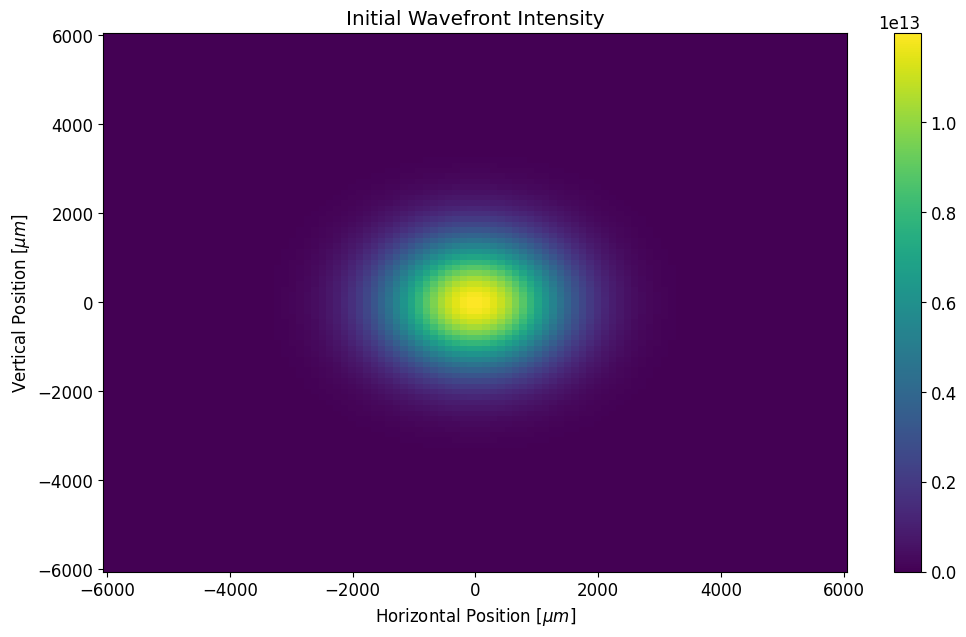

In [7]:
# plot initial intensity
fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plt.pcolormesh(np.multiply(xvalsf02,1e6), np.multiply(yvalsf02,1e6), int0_2d, cmap=plt.cm.viridis, shading='auto')
# plt.pcolormesh(np.multiply(xvals_gsn_init,1e3), np.multiply(yvals_gsn_init,1e3), int0_2d, cmap = Beach, shading='auto')
plt.colorbar()

# ax.set_ylim(-45, 45)
# ax.set_xlim(-45, 45)
ax.set_ylabel(r'Vertical Position [$\mu m$]')
ax.set_xlabel(r'Horizontal Position [$\mu m$]')
ax.set_title('Initial Wavefront Intensity')

Text(0.5, 1.0, 'Initial Wavefront Phase')

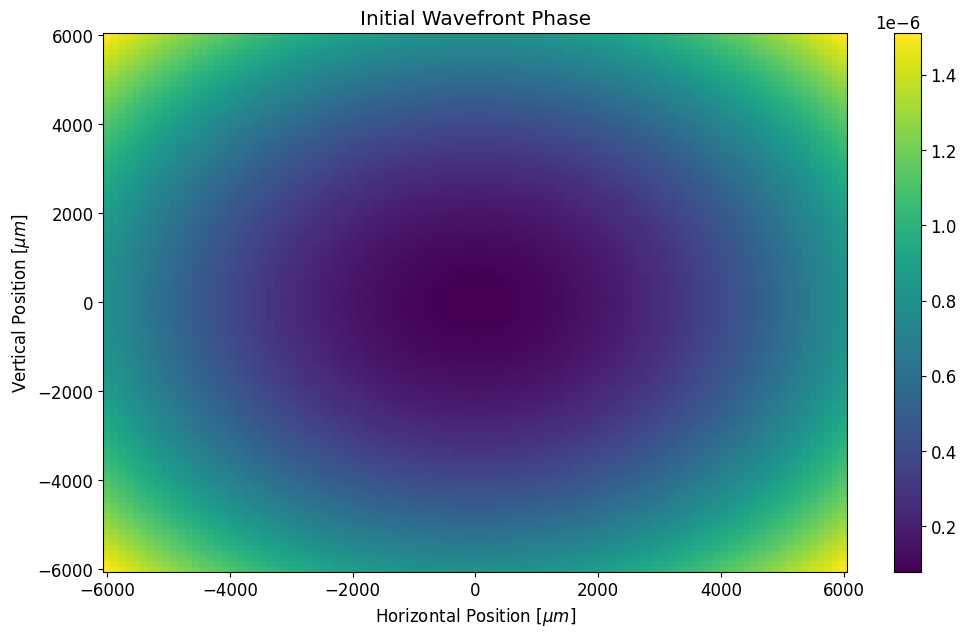

In [8]:
# plot initial phase
fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plt.pcolormesh(np.multiply(xvalsf02,1e6), np.multiply(yvalsf02,1e6), phase0_2d, cmap=plt.cm.viridis, shading='auto')
# plt.pcolormesh(np.multiply(xvals_gsn_init,1e3), np.multiply(yvals_gsn_init,1e3), int0_2d, cmap = Beach, shading='auto')
plt.colorbar()

# ax.set_ylim(-45, 45)
# ax.set_xlim(-45, 45)
ax.set_ylabel(r'Vertical Position [$\mu m$]')
ax.set_xlabel(r'Horizontal Position [$\mu m$]')
ax.set_title('Initial Wavefront Phase')

In [16]:
Etot0_2d = re0_2d + 1j*im0_2d

jx_cen = np.floor(nx_init / 2).astype(int)
jy_cen = np.floor(ny_init / 2).astype(int)
print(jx_cen, jy_cen)

phase0 = Etot0_2d[jx_cen, jy_cen] / np.abs(Etot0_2d[jx_cen, jy_cen])
print(phase0)

Etot0_2d_pc = Etot0_2d / phase0

50 50
(1+7.97033e-08j)


Text(0.5, 1.0, 'Initial Wavefront Re(E)')

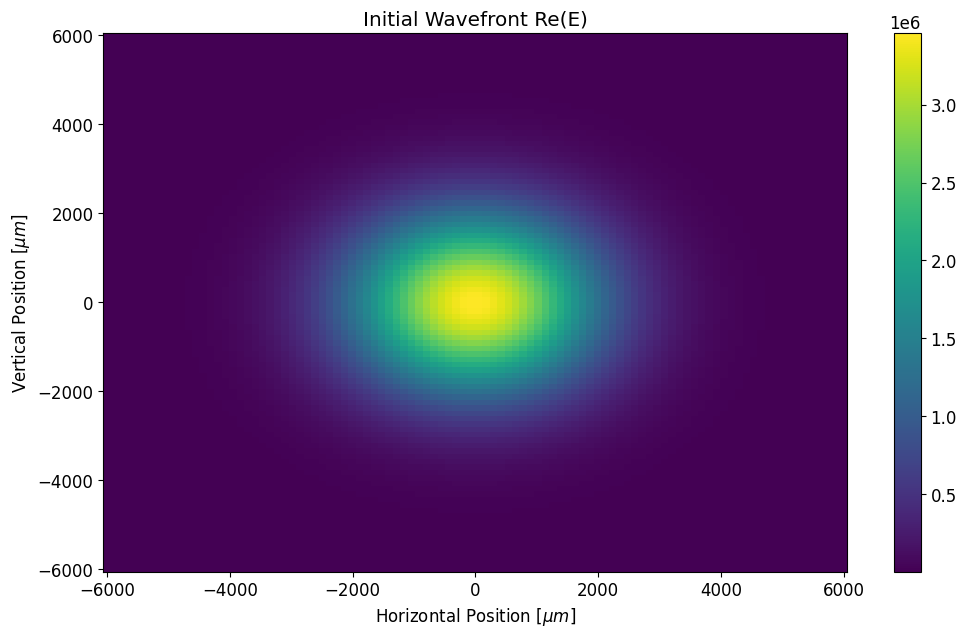

In [17]:
# plot initial Re(E)
fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plt.pcolormesh(np.multiply(xvalsf02,1e6), np.multiply(yvalsf02,1e6), np.real(Etot0_2d_pc), cmap=plt.cm.viridis, shading='auto')
# plt.pcolormesh(np.multiply(xvals_gsn_init,1e3), np.multiply(yvals_gsn_init,1e3), int0_2d, cmap = Beach, shading='auto')
plt.colorbar()

# ax.set_ylim(-45, 45)
# ax.set_xlim(-45, 45)
ax.set_ylabel(r'Vertical Position [$\mu m$]')
ax.set_xlabel(r'Horizontal Position [$\mu m$]')
ax.set_title('Initial Wavefront Re(E)')

Text(0.5, 1.0, 'Initial Wavefront Im(E)')

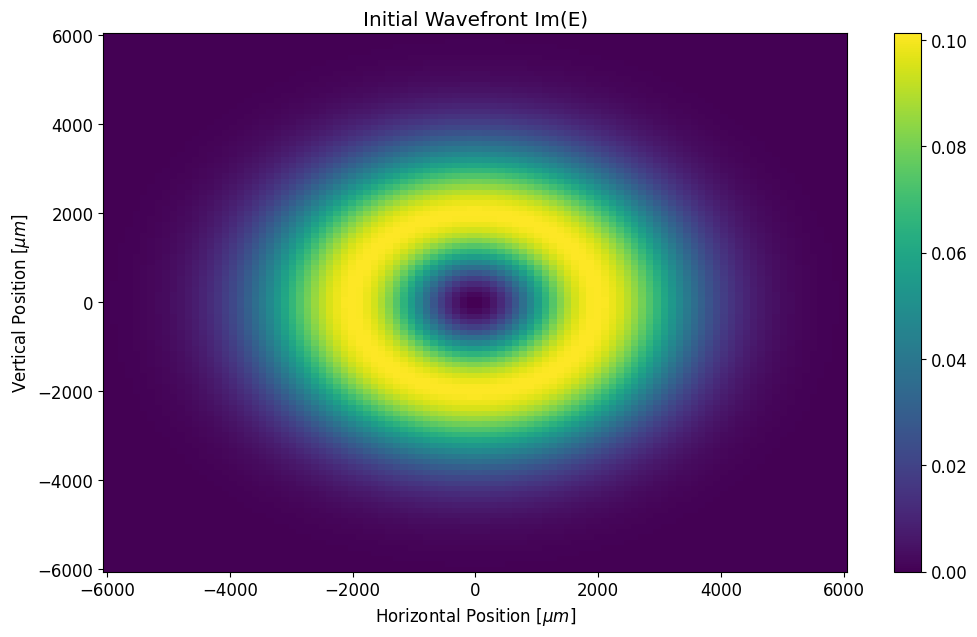

In [20]:
# plot initial Im(E)
fig = plt.figure(figsize=(12,7))
ax = fig.gca()

plt.pcolormesh(np.multiply(xvalsf02,1e6), np.multiply(yvalsf02,1e6), np.imag(Etot0_2d_pc), cmap=plt.cm.viridis, shading='auto')
# plt.pcolormesh(np.multiply(xvals_gsn_init,1e3), np.multiply(yvals_gsn_init,1e3), int0_2d, cmap = Beach, shading='auto')
plt.colorbar()

# ax.set_ylim(-45, 45)
# ax.set_xlim(-45, 45)
ax.set_ylabel(r'Vertical Position [$\mu m$]')
ax.set_xlabel(r'Horizontal Position [$\mu m$]')
ax.set_title('Initial Wavefront Im(E)')

#### propagate Gsn fields via LCT